# Homework 14

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import quad

## Problem 1 (1 point)

The kinetic theory of gases used in physical chemistry says that gas molecules have a range of speeds. The Maxwell-Boltzmann probability $p$ of finding a gas molecule at speed $v$ is
$$ p(v) = 4\pi v^2\left( \frac{M}{2 \pi RT} \right)^{3/2} \exp\left( -\frac{Mv^2}{2RT}\right)$$ where $T$ is absolute temperature, $M$ is the molar mass of the molecule, and $R$ is the ideal gas constant.

By design this probability is _normalized_, meaning that $$\int_0^\infty p(v)~dv = 1$$


The above two equations must obey the rules about units, meaning that the quantity inside the $\exp$ part of $p(v)$ must be dimensionless, and the integral as a whole must be dimensionless (the quantity of one has no units). If $v$ and $dv$ are in units m/s and $R$ is in units J/(mol.K) and $T$ is in units K, then what must be the units for $M$? Using Markdown, provide mathematical justification of your answer. 

### Answer:

The easiest way to infer the units of M is to look specifically at the component of the equation inside of the exponent, as the units will need to cancel out. Removing constants and plugging in the units of the variables we get:

$$
\text{Exponent} = \frac{M v^2}{2 R T}
$$

$$
1 = \frac{M_{\text{units}} \times \left[ \frac{m}{s} \right]^2} {\frac{J}{mol \times K} \times K}
$$

$$
M_{\text{units}} = \frac{\frac{kg \times m^2}{s^2} \times s^2}{mol \times m^2}
$$

$$
M_{\text{units}} = \frac{kg}{mol}
$$

The molar mass $M$ is in units $\frac{kg}{mol}$

## Problem 2 (2 points)

(Continuation of Problem 1)

(a) Make a function that calculates the Maxwell-Boltzmann probability for any molecule and temperature. The value of $R$ should be hard-coded inside the function, but $v$, $M$, and $T$ should be arguments.

(b) For the molecule $\mathrm{O_2}$ at $T=300~\mathrm{K}$ numerically solve the above normalization integral using `quad` and the function you made in part (a) 

Note: You cannot use infinity for the upper limit in a numerical solution, so replace $\infty$ with $v_\mathrm{big}$. Try different values for $v_\mathrm{big}$ to find one at which the numerical integral is converged to 1 within one part per million (i.e. $|I-1|<10^{-6}$ where $I$ is the integral) 

Print your value of $v_\mathrm{big}$ along with its units (m/s). Print the numerical value of the integral you got. Print the absolute value of the difference betweeen your integral and the correct answer of 1. The information in each of these print statements should be easily read and interpreted by the user.

In [2]:
O2_mol_mass = 31.9989/1000                 # (g/mol)*(1kg/1000g) => (km/mol)
T = 300                                    # K
max_er = 10**(-6)

def p_maxwell_bolts(v, M, T):
    R = 8.31446                            # J/(mol*K)
    return 4 * np.pi* v**2 * (M / (2 * np.pi * R * T))**(3/2) * np.exp(-1*(M * v**2)/(2 * R * T))

In [13]:
# Calculate I value at an initial guess for v_max
v_big = 100                                # m/s (Initial guess of required v_big)
I = quad(p_maxwell_bolts, 0, v_big, args=(O2_mol_mass,T))[0]

# Increase v_max until I is within less than the maximum error of 1
while(np.abs(I - 1) > max_er):
    v_big *= 1.1
    I = quad(p_maxwell_bolts, 0, v_big, args=(O2_mol_mass,T))[0]

# Print out the calculated values
print("We iterated through various upper integral bounds until the integral of the Maxwell-Boltzman probability was within {max_er:.2E} of 1.".format(max_er=max_er))
print("The required upper integral bound was found to be \033[1m{v_big:.2f}\033[0m".format(v_big=v_big))
print("The value of the integral calulated from 0 to {v_big:.2f} to 16 decimal places is \033[1m{I}\033[0m".format(v_big=v_big, I=I))
print("The difference between the calulated integral and 1 was \033[1m{diff:.2E}\033[0m, which is less than the maximum error of {max_er:.2E}.".format(diff=np.abs(I - 1), max_er=max_er))

We iterated through various upper integral bounds until the integral of the Maxwell-Boltzman probability was within 1.00E-06 of 1.
The required upper integral bound was found to be 1586.31
The value of the integral calulated from 0 to 1586.31 to 16 decimal places is 0.9999995435135147
The difference between the calulated integral and 1 was 4.56E-07, which is less than the maximum error of 1.00E-06.


## Problem 3 (2 points)

(Continuation of Problem 2)

The average speed of a molecule can be determined by trying out all possible speeds of a molecule, weighted by the Maxwell-Boltzmann probability. The resulting formula is
$$ \bar{v} = \int_0^\infty v~p(v)~dv $$ Find the value of $\bar{v}$ for the molecule $\mathrm{O_2}$ at $T=300~\mathrm{k}$ in units m/s. Use the same value of $v_\mathrm{big}$ developed for Problem 2. Again, you should be using the `quad` function.




In [4]:
p_v̄ = lambda v, M, T : v * p_maxwell_bolts(v, M, T)   # Define a new integrand to be used by quad()
v̄ = quad(p_v̄, 0, v_big, args=(O2_mol_mass,T))[0]      # Calculate the integral
print("The average speed of an O\u2082 molecule at {T}K, as calculated using a Maxwell-Boltzmann probability is aproximately \033[1m{v̄:.2f} m/s\033[0m".format(T=T,v̄=v̄))

The average speed of an O₂ molecule at 300K, as calculated using a Maxwell-Boltzmann probability is aproximately 445.53 m/s


## Problem 4 (3 points)

The following equation describes the temperature-dependent heat capacity for $\mathrm{CO_{2(g)}}$.

$$c_{p}(T) = R\cdot \left(a_{0} + a_{1}T + a_{2}T^2 + a_{3}T^3 + a_{4}T^4 \right)$$ where $R$ is the ideal gas constant, $T$ is in units K, and


| $a_0$           | $a_1$             | $a_2$            | $a_3$             | $a_4$             |
|-----------------|-------------------|------------------|-------------------|-------------------|
| 2.356773520E+00 |   8.984596770E-03 | -7.123562690E-06 |   2.459190220E-09 |  -1.436995480E-13 |

The _enthalpy_ of the species is given by

$$h(T) = h_{f} + \int_{T_\mathrm{ref}}^{T}c_{p}(T)~dT.$$

Here, $h_{f} = -393.509~\mathrm{kJ/mol}$ is the _heat of formation_ of the species at reference temperature $T_\mathrm{ref}=298.15~\mathrm{K}$. 

* Use ```quad``` to make a function for $h(T)$ in units kJ/mol. Make sure to convert $c_p$ to the right units.
* Then make a smooth and well-formatted plot of the enthalpy of CO$_2$ for a range of temperatures from 300 to 1000 K (make sure those temperatures are floats, not integers!)


In [5]:
def c_p(T, a): # returns in kJ/(mol*K)
    R = 8.31446/1000                  # J/(mol*K) * (1kJ/1000J) = kJ/(mol*K)
    c_p = 0
    for i in range(len(a)):
        c_p += a[i] * T**i
    c_p *= R
    return c_p

def h(T, a): # returns in kJ/mol
    T_ref = 298.15                    # K
    h_f = -393.509                    # kJ/mol
    return h_f + quad(c_p, T_ref, T, args=(a,))[0]

In [6]:
a_CO_2 = np.array([2.356773520E+00, 8.984596770E-03, -7.123562690E-06, 2.459190220E-09, -1.436995480E-13])
T_range = np.arange(300, 1000, 0.1)

h_CO_2 = np.zeros(len(T_range))
for i in range(len(h_CO_2)): h_CO_2[i] = h(T_range[i], a_CO_2)

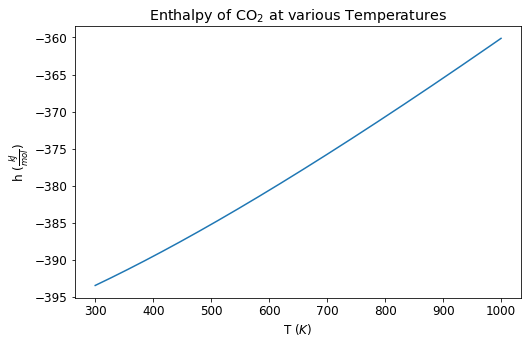

In [7]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 12})

plt.title(r"Enthalpy of CO$_2$ at various Temperatures")
plt.ylabel(r"h ($\frac{kJ}{mol}$)")
plt.xlabel(r"T ($K$)")
plt.plot(T_range, h_CO_2);

In [8]:
integrand1 = lambda x, y: x**2 + 4 * y**2
integrand2 = lambda y: quad(integrand1, 0, 1, args=(y,))[0]

quad(integrand2,0,1)[0]

1.6666666666666667